In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *

%matplotlib inline

fig_name = "consensus_nonconsensus_compare"
mg_color = '#00af2b'
h2o_color = '#df0303'
mg_light_color = '#b2e7bf'
h2o_light_color = '#f29a9a'

ticksize = 12
labelsize = 14
dpi = 400
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['mathtext.fontset'] = 'cm' 


In [2]:
df = pd.read_csv('all_solvent_consensus_status_withconsensus.csv')
df22wat = df[(df.model=='2.2Å') & (df.solvent=="HOH")].copy()
df22mg = df[(df.model=='2.2Å') & (df.solvent=="MG")].copy()
df23wat = df[(df.model=='2.3Å') & (df.solvent=="HOH")].copy()
df23mg = df[(df.model=='2.3Å') & (df.solvent=="MG")].copy()

# either
df22wat['Consensus'] = df22wat['consensus of wat in 2.3Å'] #((df22wat['within 1A of wat in 2.3Å']>0) & (df22wat['exact binding spot of wat in 2.3Å']>0))
df23wat['Consensus'] = df23wat['consensus of wat in 2.2Å'] #((df23wat['within 1A of wat in 2.2Å']>0) & (df23wat['exact binding spot of wat in 2.2Å']>0))
df22mg['Consensus'] = df22mg['consensus of mg in 2.3Å'] #((df22mg['within 1A of mg in 2.3Å']>0) & (df22mg['exact binding spot of mg in 2.3Å']>0))
df23mg['Consensus'] = df23mg['consensus of mg in 2.2Å'] #((df23mg['within 1A of mg in 2.2Å']>0) & (df23mg['exact binding spot of mg in 2.2Å']>0))

In [3]:
qscore_22_file = QSCORE_22
qscore_23_file = QSCORE_23

# read and format Qscores
col_names = ['atom_name','residue_number','residue_name','x_coord','y_coord','z_coord','Qscore']

qscore_22 = pd.read_csv(qscore_22_file,names=col_names)
qscore_22["residue_number"] = qscore_22.residue_number.apply(lambda x: int(x.split(".")[0]))
qscore_23 = pd.read_csv(qscore_23_file,names=col_names)
qscore_23["residue_number"] = qscore_23.residue_number.apply(lambda x: int(x.split(".")[0]))

In [4]:
q22wat = qscore_22[qscore_22.residue_name=="HOH"]
q22wat = dict(zip(q22wat.residue_number, q22wat.Qscore))
df22wat['Qscore'] = df22wat.residue_number.replace(q22wat)
q22mg = qscore_22[qscore_22.residue_name=="MG"]
q22mg = dict(zip(q22mg.residue_number, q22mg.Qscore))
df22mg['Qscore'] = df22mg.residue_number.replace(q22mg)

q23wat = qscore_23[qscore_23.residue_name=="HOH"]
q23wat = dict(zip(q23wat.residue_number, q23wat.Qscore))
df23wat['Qscore'] = df23wat.residue_number.replace(q23wat)
q23mg = qscore_23[qscore_23.residue_name=="MG"]
q23mg = dict(zip(q23mg.residue_number, q23mg.Qscore))
df23mg['Qscore'] = df23mg.residue_number.replace(q23mg)

In [5]:
df = pd.concat([df22wat,df23wat,df22mg,df23mg])
df["category"] = df.solvent + df.Consensus.astype(str)

# leaving out water >0.5 for now
df = df[df.binding_site==df.binding_site]
per_res_info = pd.read_csv('../per_residue_comparison/per_residue_summary.csv')
per_res_rmsd_dict = dict(zip(per_res_info.residue_number, per_res_info.RMSD))
per_res_Q22_dict = dict(zip(per_res_info.residue_number, per_res_info["Qscore 2.2A"]))
per_res_Q23_dict = dict(zip(per_res_info.residue_number, per_res_info["Qscore 2.3A"]))
df["avg_rmsd_nearby"] = df.binding_site.apply(lambda atoms: np.mean([per_res_rmsd_dict[int(res)] for res in [atom.split("-")[1].split(":")[0] for atom in atoms.split()] if res!='414']))
df["avg_Q_nearby"] = df.apply(lambda row: np.mean([per_res_Q22_dict[int(res)] for res in[atom.split("-")[1].split(":")[0] for atom in row.binding_site.split()]  if res!='414']) if row.model=="2.2" else np.mean([per_res_Q23_dict[int(res)] for res in[atom.split("-")[1].split(":")[0] for atom in row.binding_site.split()]  if res!='414']), axis=1)
df22wat = df[(df.model=='2.2Å') & (df.solvent=="HOH")].copy()
df23wat = df[(df.model=='2.3Å') & (df.solvent=="HOH")].copy()

/tmp/ipykernel_138928/2383678318.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["category"] = df.solvent + df.Consensus.astype(str)


/tmp/ipykernel_138928/883169656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_138928/883169656.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_138928/883169656.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")
/tmp/ipykernel_138928/883169656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_138928/883169656.py:26: FutureWarning:

34 60
0.05731573344036404 819.0 34 60
268 268
0.0006144222602955939 30117.0 268 268
34 60
0.0022756434738570837 659.0 34 60
268 268
1.0290565590152863e-06 27400.0 268 268
34 60
0.026672299903012953 774.0 34 60
268 268
3.835459351750861e-05 28822.0 268 268


/tmp/ipykernel_138928/883169656.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")
/tmp/ipykernel_138928/883169656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_138928/883169656.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g=sns.violinplot(data=df, y=y, x="category",
/tmp/ipykernel_138928/883169656.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")


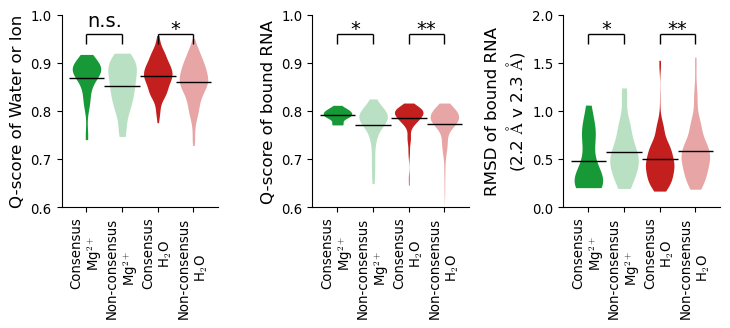

In [6]:
def get_sig(p):
    if p>0.05: sig="n.s."
    elif p>0.0001:  sig="*"
    elif p>0.000001: sig="**"
    elif p>0.00000001: sig="***"
    else: sig="****"
    return sig

def plot_a_score_by_consensus(df,y,ax,ymin,ymax,xticks=None,ylabel=None):
    g1 = df[df.category=="MGTrue"][y].values
    g2 = df[df.category=="MGFalse"][y].values
    print(len(g1),len(g2))
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    t_1, p_1 = stats.mannwhitneyu(g1, g2)
    m1a, m1b = g1.mean(), g2.mean()
    print(p_1,t_1,len(g1),len(g2))
    g1 = df[df.category=="HOHTrue"][y].values
    g2 = df[df.category=="HOHFalse"][y].values
    print(len(g1),len(g2))
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    t_2, p_2 = stats.mannwhitneyu(g1, g2)
    m2a, m2b = g1.mean(), g2.mean()
    print(p_2,t_2,len(g1),len(g2))
    g=sns.violinplot(data=df, y=y, x="category",
             palette={"MGTrue":mg_color,
                      "MGFalse":mg_light_color,
                     "HOHTrue":h2o_color,
                      "HOHFalse":h2o_light_color},cut=0,scale="width",inner=None,linewidth=0,
            order = ["MGTrue","MGFalse","HOHTrue","HOHFalse"],ax=ax)
    g.set_xlabel("")
    if ylabel is None:
        g.set_ylabel("")
        g.set_yticks([])
    else:
        g.set_ylabel(ylabel,fontsize=ticksize)
        ax.tick_params(axis='y', labelsize=ticksize*0.8)
    g.set_ylim(ymin,ymax)
    if xticks is None:
        x=g.set_xticks([])
    else:
        x=g.set_xticklabels(xticks,size=ticksize*0.8,rotation=90,ha="center")
    sns.despine()
    
    sig_1 = get_sig(p_1)
    sig_2 = get_sig(p_2)
    # * < 0.05 ** < 104 *** < 106 **** < 108
    good_y =ymax-((ymax-ymin)*0.1)
    good_y2 =ymax-((ymax-ymin)*0.15)
    if sig_1 == "n.s.": y_now = ymax-((ymax-ymin)*0.06)
    else: y_now = good_y
    ax.text(0.5,y_now,sig_1,rotation=0,size=labelsize,ha="center")
    if sig_2 == "n.s.": y_now = ymax-((ymax-ymin)*0.06)
    else: y_now = good_y
    ax.text(2.5,y_now,sig_2,rotation=0,size=labelsize,ha="center")
    ax.hlines(good_y,0,1,"black",linewidth=1)
    ax.vlines(0,good_y,good_y2,"black",linewidth=1)
    ax.vlines(1,good_y,good_y2,"black",linewidth=1)
    ax.hlines(good_y,2,3,"black",linewidth=1)
    ax.vlines(2,good_y,good_y2,"black",linewidth=1)
    ax.vlines(3,good_y,good_y2,"black",linewidth=1)
    ax.hlines(m1a,-0.5,0.5,"black",linewidth=1)
    ax.hlines(m1b,0.5,1.5,"black",linewidth=1)
    ax.hlines(m2a,1.5,2.5,"black",linewidth=1)
    ax.hlines(m2b,2.5,3.5,"black",linewidth=1)
    
fig,axes = plt.subplots(1,3,figsize=(8.5,2.5))
plot_a_score_by_consensus(df,"Qscore",axes[0],0.6,1.0,ylabel="Q-score of Water or Ion",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
plot_a_score_by_consensus(df,"avg_Q_nearby",axes[1],0.6,1,ylabel="Q-score of bound RNA",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
plot_a_score_by_consensus(df,"avg_rmsd_nearby",axes[2],0,2, ylabel="RMSD of bound RNA\n(2.2 $\mathrm{\AA}$ v 2.3 $\mathrm{\AA}$)",xticks=('Consensus\nMg$^{2+}$', 'Non-consensus\nMg$^{2+}$','Consensus\nH$_2$O','Non-consensus\nH$_2$O'))
                          #('Non-consensus\nMg²⁺', 'Consensus\nMg²⁺','Non-consensus\nH₂O', 'Consensus\nH₂O'),
                         
fig.subplots_adjust(wspace=0.6)

plt.savefig(f"{fig_name}.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name}.svg", bbox_inches="tight",transparent=True)

In [109]:
df22mg[df22mg.binding_site.str.contains("O2'")]

,model,solvent,residue_number,close_binding_site,binding_site,within 1A of mg in 7yga,within 1A of wat in 7yga,exact binding spot of mg in 7yga,exact binding spot of wat in 7yga,atom binding of wat in 7yga,...,binding spot of mg in 8hd7,binding spot of wat in 8hd7,consensus of mg in 8hd7,consensus of wat in 8hd7,binding spot of mg in 8i7n,binding spot of wat in 8i7n,consensus of mg in 8i7n,consensus of wat in 8i7n,Consensus,Qscore
283,2.2Å,MG,437,NaN,G-313:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,True,0.892800
288,2.2Å,MG,442,NaN,G-275:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,True,0.880663
291,2.2Å,MG,445,NaN,A-140:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.809600
299,2.2Å,MG,453,NaN,U-155:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.910080


In [110]:
df23mg[df23mg.binding_site.str.contains("O2'")]

,model,solvent,residue_number,close_binding_site,binding_site,within 1A of mg in 7yga,within 1A of wat in 7yga,exact binding spot of mg in 7yga,exact binding spot of wat in 7yga,atom binding of wat in 7yga,...,binding spot of mg in 8hd7,binding spot of wat in 8hd7,consensus of mg in 8hd7,consensus of wat in 8hd7,binding spot of mg in 8i7n,binding spot of wat in 8i7n,consensus of mg in 8i7n,consensus of wat in 8i7n,Consensus,Qscore
596,2.3Å,MG,422,NaN,A-183:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.848347
601,2.3Å,MG,427,NaN,C-213:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.903359
606,2.3Å,MG,432,NaN,U-177:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.820363
607,2.3Å,MG,433,NaN,A-299:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.830587
610,2.3Å,MG,436,NaN,G-275:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,True,0.895290
614,2.3Å,MG,440,NaN,G-313:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,True,0.887961
618,2.3Å,MG,444,NaN,A-187:O2',0,0,0,0,0,...,0,0,False,False,0,0,False,False,False,0.760684


In [7]:

cols = ['model',
 'solvent',
 'residue_number',
 'close_binding_site',
 'binding_site',
 'within 1A of mg in 2.2Å',
 #'within 1A of wat in 2.2Å',
 'exact binding spot of mg in 2.2Å',
 #'exact binding spot of wat in 2.2Å',
 #'atom binding of wat in 2.2Å',
 #'atom binding of mg in 2.2Å',
 'within 1A of mg in 2.3Å',
 #'within 1A of wat in 2.3Å',
 'exact binding spot of mg in 2.3Å',
 #'exact binding spot of wat in 2.3Å',
 #'atom binding of wat in 2.3Å',
 #'atom binding of mg in 2.3Å',
 'binding spot of mg in 2.2Å',
 #'binding spot of wat in 2.2Å',
 'consensus of mg in 2.2Å',
 #'consensus of wat in 2.2Å',
 'binding spot of mg in 2.3Å',
 #'binding spot of wat in 2.3Å',
 'consensus of mg in 2.3Å',
 #'consensus of wat in 2.3Å',
 'Consensus',
 'Qscore']

In [8]:
df22mg[df22mg.residue_number==416][cols]

,model,solvent,residue_number,close_binding_site,binding_site,within 1A of mg in 2.2Å,exact binding spot of mg in 2.2Å,within 1A of mg in 2.3Å,exact binding spot of mg in 2.3Å,binding spot of mg in 2.2Å,consensus of mg in 2.2Å,binding spot of mg in 2.3Å,consensus of mg in 2.3Å,Consensus,Qscore
262,2.2Å,MG,416,A-308:OP,A-308:OP,MG-416:MG,1,MG-417:MG,0,1,True,0,False,False,0.905279


In [9]:
df23mg[df23mg.residue_number==417][cols]

# these are defined as different binding sites, so their non consensus makes sense

,model,solvent,residue_number,close_binding_site,binding_site,within 1A of mg in 2.2Å,exact binding spot of mg in 2.2Å,within 1A of mg in 2.3Å,exact binding spot of mg in 2.3Å,binding spot of mg in 2.2Å,consensus of mg in 2.2Å,binding spot of mg in 2.3Å,consensus of mg in 2.3Å,Consensus,Qscore
591,2.3Å,MG,417,NaN,U-307:OP A-308:OP,MG-416:MG,0,MG-417:MG,0,0,False,1,True,False,0.902258


In [10]:
df['atoms'] = df.apply(lambda row: [x.split(':')[-1] for x in row.close_binding_site.split(' ')] if row.close_binding_site==row.close_binding_site else [x.split(':')[-1] for x in row.binding_site.split(' ')] , axis=1)

BACKBONE = ["C1'", "C2'", "C3'", "C4'", "C5'", "O4'", "O5'", "O2'", "O3'",'P','OP1', 'OP2','OP']
SUGAR = ["C1'", "C2'", "C3'", "C4'", "C5'", "O4'", "O2'"]
PHOSPHATE = ['P','OP1', 'OP2', "O5'", "O3'",'OP']
PHOSPHOROUS = ['P']
BRIDING_O = ["O5'", "O3'"]
OP = ['OP1', 'OP2','OP']

df_sugar = df['atoms'].apply(lambda x: any(item in SUGAR for item in x))
df_o = df['atoms'].apply(lambda x: any(item in BRIDING_O+OP for item in x))
df_p = df['atoms'].apply(lambda x: any(item in PHOSPHOROUS for item in x))
df_backbone = df['atoms'].apply(lambda x: any(item in BACKBONE for item in x))
df_base = df['atoms'].apply(lambda x: any(item not in BACKBONE for item in x))

df['cat_of_site'] = pd.DataFrame([df_backbone,df_sugar,df_base,df_p,df_o]).T.apply(lambda row: ' '.join([s for s, b in zip(['backbone','sugar','base','p','o'], row) if b]), axis=1)
df['back_base'] = pd.DataFrame([df_backbone,df_base]).T.apply(lambda row: ' & '.join([s for s, b in zip(['backbone','base'], row) if b]), axis=1)

df['num_atoms'] = df.atoms.apply(len)

(0.7, 0.86)

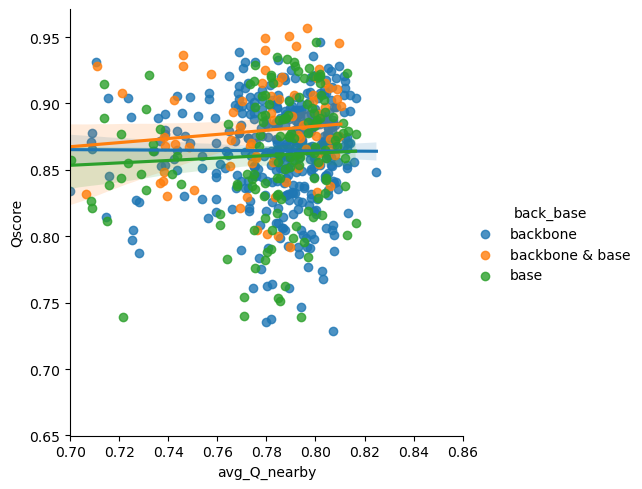

In [11]:
sns.lmplot(df,x='avg_Q_nearby',y='Qscore',hue='back_base') # [df.solvent=='HOH']
plt.xlim(0.7,0.86)
# no clear trend here

backbone 394 0.8644352764042539
base 156 0.8600213008049232
both 80 0.8786238327622374
base v backbone 0.22976934682383837 29489.0
backbone v both 0.0030557021740050773 12697.0
base v both 0.003572549913855754 4904.0
backbone 319 0.8640652795944201
base 137 0.8648017536114598
both 80 0.8786238327622374
base v backbone 0.31982755395620405 21247.0
backbone v both 0.0022624102672900285 10141.0
base v both 0.021214038507750284 4574.0
backbone 75 0.8660089961687468
base 19 0.825551720042
both 0 nan
base v backbone 0.0006845014227763899 372.0
backbone v both 0.0 0.0
base v both 0.0 0.0


/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/tmp/ipykernel_138928/2235454248.py:15: RuntimeWarning: Mean of empty slice.
  print('both',len(g3),g3.mean())
/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_138928/2235454248.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([ "Mg$^{2+}$","H$_2$O"],size=7,rotation=0,ha="center")


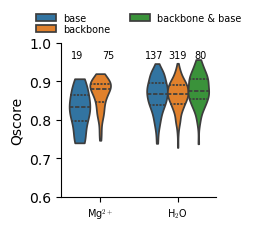

In [104]:
fig,axes = plt.subplots(1,1,figsize=(2,2),sharey=True)

def get_stats(df,y="Qscore"):
    g1 = df[df.back_base=="backbone"][y].values
    g2 = df[df.back_base=="base"][y].values
    g3 = df[df.back_base=="backbone & base"][y].values
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    g3 = g3[~np.isnan(g3)]
    t_1, p_1 = stats.mannwhitneyu(g1, g2)
    t_2, p_2 = stats.mannwhitneyu(g1, g3)
    t_3, p_3 = stats.mannwhitneyu(g2, g3)
    print('backbone',len(g1),g1.mean())
    print('base',len(g2),g2.mean())
    print('both',len(g3),g3.mean())
    print('base v backbone',p_1,t_1)
    print('backbone v both',p_2,t_2)
    print('base v both',p_3,t_3)

get_stats(df)
get_stats(df[df.solvent=='HOH'])
get_stats(df[df.solvent=='MG'])

g=sns.violinplot(data=df, y='Qscore', x="solvent",hue="back_base",
        cut=0,density_norm="width",hue_order=['base','backbone','backbone & base'],
                inner="quart",order=['MG','HOH'])#inner="quart",linewidth=0,split=True)
g.text(0.7,0.96,f"{len(df[(df.solvent=='HOH')&(df.back_base=='base')])}",ha='center',size=7)
g.text(1,0.96,f"{len(df[(df.solvent=='HOH')&(df.back_base=='backbone')])}",ha='center',size=7)
g.text(1.3,0.96,f"{len(df[(df.solvent=='HOH')&(df.back_base=='backbone & base')])}",ha='center',size=7)

g.text(-0.3,0.96,f"{len(df[(df.solvent=='MG')&(df.back_base=='base')])}",ha='center',size=7)
g.text(0.1,0.96,f"{len(df[(df.solvent=='MG')&(df.back_base=='backbone')])}",ha='center',size=7)

g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2,frameon=False, markerscale=0.1,labelspacing=0.1,
                title_fontsize=7,fontsize=7)

sns.despine()

g.set_ylim(0.6,1.0)
g.set_xticklabels([ "Mg$^{2+}$","H$_2$O"],size=7,rotation=0,ha="center")
g.set_xlabel('')
plt.savefig(f"Q_v_backboneORbase.png",dpi=dpi, bbox_inches="tight",transparent=True)


/tmp/ipykernel_138928/2579203004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_atoms'] = df.num_atoms.astype(str)
/tmp/ipykernel_138928/2579203004.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(),size=7)
/tmp/ipykernel_138928/2579203004.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([ "Mg$^{2+}$","H$_2$O"],size=7,rotation=0,ha="center")
/tmp/ipykernel_138928/2579203004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

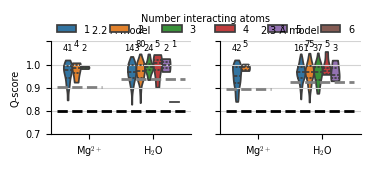

In [89]:
fig,axes = plt.subplots(1,2,figsize=(4,1.2),sharey=True)
def plot_Q_num_atoms(df,ax,res,legend=False):
    df['num_atoms'] = df.num_atoms.astype(str)
    g=sns.violinplot(data=df, y='Qscore', x="solvent",hue="num_atoms",
            cut=0,density_norm="width",hue_order=['1','2','3','4','5','6'],
                    inner="quart",ax=ax,order=['MG','HOH'])#inner="quart",linewidth=0,split=True)
    g.text(0.67,0.96,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='1')])}",ha='center',size=6)
    g.text(0.8,0.98,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='2')])}",ha='center',size=6)
    g.text(0.93,0.96,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='3')])}",ha='center',size=6)
    g.text(1.07,0.98,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='4')])}",ha='center',size=6)
    g.text(1.2,0.96,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='5')])}",ha='center',size=6)
    
    g.text(-0.33,0.96,f"{len(df[(df.solvent=='MG')&(df.num_atoms=='1')])}",ha='center',size=6)
    g.text(-0.2,0.98,f"{len(df[(df.solvent=='MG')&(df.num_atoms=='2')])}",ha='center',size=6)

    if legend:
        g.legend(loc='upper center', bbox_to_anchor=(1.1, 1.4), ncol=6,frameon=False,
                 title='Number interacting atoms',fontsize=7, markerscale=0.1,labelspacing=0.1,
                title_fontsize=7)
        g.text(1.33,0.98,f"{len(df[(df.solvent=='HOH')&(df.num_atoms=='6')])}",ha='center',size=6)
        g.text(-0.07,0.96,f"{len(df[(df.solvent=='MG')&(df.num_atoms=='3')])}",ha='center',size=6)
        g.set_yticklabels(g.get_yticklabels(),size=7)
    else:
        g.legend([], [], frameon=False)
    sns.despine()
    g.set_ylim(0.6,1.0)
    g.set_xticklabels([ "Mg$^{2+}$","H$_2$O"],size=7,rotation=0,ha="center")
    g.set_xlabel('')
    g.set_ylabel('Q-score',size=7)
    
    avgQIon =  -0.1103 * res + 1.0795 # ion
    avgQWater =  -0.0895 *res + 1.0001 # water
    g.hlines(avgQWater,-0.5,0.2,color="grey",linestyles="dashed",linewidth=2)
    g.hlines(avgQIon,0.5,1.5,color="grey",linestyles="dashed",linewidth=2)
    g.hlines(0.7,-0.5,1.5,color="black",linestyles="dashed",linewidth=2)
    g.set_title(f"{res} Å model",size=7)
    ax.yaxis.grid(True, which='both')
    ax.set_yticks([0.6,0.7,0.8,0.9,1.0])
    ax.yaxis.grid(True, which='major',color="lightgrey")
plot_Q_num_atoms(df[df.model=='2.2Å'],axes[0],2.2,legend=True)
plot_Q_num_atoms(df[df.model=='2.3Å'],axes[1],2.3)



plt.savefig(f"Q_v_numinteracting_atoms.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig(f"Q_v_numinteracting_atoms.svg", bbox_inches="tight",transparent=True)

In [91]:
import statsmodels.api as sm
to_test = df[(df.solvent=='HOH') & (df.num_atoms<=4)] # 4 as those are the only ones that would be reasonable.
X = to_test.num_atoms
y = to_test.Qscore

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
# not significant for both

to_test = df[(df.solvent=='HOH') & (df.num_atoms<=4) & (df.model=='2.2Å')] # 4 as those are the only ones that would be reasonable.
X = to_test.num_atoms
y = to_test.Qscore

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
# sig for 2.2A 

to_test = df[(df.solvent=='HOH') & (df.num_atoms<=4) & (df.model=='2.3Å')] # 4 as those are the only ones that would be reasonable.
X = to_test.num_atoms
y = to_test.Qscore

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
# no sig for 2.3A 

# note if do for all water, including the 5 and 6, then none are signifcant.

                            OLS Regression Results                            
Dep. Variable:                 Qscore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.370
Date:                Thu, 02 Jan 2025   Prob (F-statistic):             0.0670
Time:                        20:33:27   Log-Likelihood:                 953.92
No. Observations:                 530   AIC:                            -1904.
Df Residuals:                     528   BIC:                            -1895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8600      0.004    215.627      0.0

backbone 394 0.7823678307215031
base 156 0.7721243199190314
both 80 0.7724073240209617
base v backbone 0.017834582844496828 27202.5
backbone v both 0.027976457561353252 13624.5
base v both 0.4359915323294463 6159.5
backbone 319 0.7831484885957885
base 137 0.7716793285815297
both 80 0.7724073240209617
base v backbone 0.012082511045836406 18942.5
backbone v both 0.02067568383189003 10878.0
base v both 0.4789990402515931 5456.0
backbone 75 0.7790474325628759
base 19 0.775332941668385
both 0 nan
base v backbone 0.4568828359516377 700.5
backbone v both 0.0 0.0
base v both 0.0 0.0


/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/tmp/ipykernel_138928/1293928255.py:13: RuntimeWarning: Mean of empty slice.
  print('both',len(g3),g3.mean())
/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


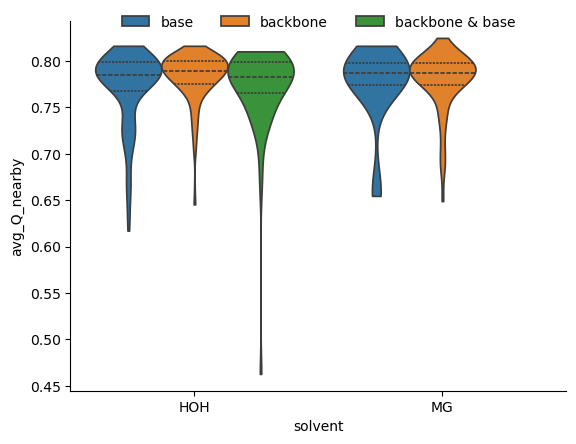

In [15]:
# no trend
get_stats(df,y="avg_Q_nearby")
get_stats(df[df.solvent=='HOH'],y="avg_Q_nearby")
get_stats(df[df.solvent=='MG'],y="avg_Q_nearby")

g=sns.violinplot(data=df, y='avg_Q_nearby', x="solvent",hue="back_base",
        cut=0,density_norm="width",hue_order=['base','backbone','backbone & base'],
                inner="quart")#inner="quart",linewidth=0,split=True)
g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3,frameon=False)

sns.despine()